# Logistic Regression

## Importing libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(303, 14)

In [5]:
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA (Exploratory Data Analysis

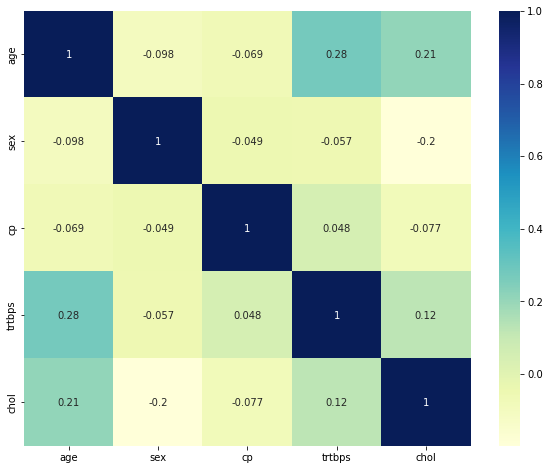

In [7]:
## we will check for correlation between Independent variables to avoid multicolinearity
plt.figure(figsize=(10,8))
sns.heatmap(data[['age', 'sex', 'cp', 'trtbps', 'chol']].corr(),annot=True,cmap="YlGnBu")

## Spliting Independent and Dependent variable

In [31]:
X = data.iloc[:, :-1].values
y = data['output'].values

In [30]:
print (X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
data[['age', 'sex', 'trtbps', 'chol']] = Sc.fit_transform(data[['age', 'sex', 'trtbps', 'chol']])

## Splitting the dataset into Training & Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 42)

## Logistic Regression Training on Training set

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

##Checking the Accuracy of the model

In [35]:
score=lr.score(X_test,y_test)
print(f"Accuracy of Logistic Regression Model ---> {score}")

Accuracy of Logistic Regression Model ---> 0.8688524590163934


## Predicting

In [42]:
y_pred=lr.predict(X_test)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix

In [44]:
## To check the performance of this classification model
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[25,  4],
       [ 4, 28]])

## Visualizing results

In [57]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[25  4]
 [ 4 28]]
Normalized confusion matrix
[[0.86 0.14]
 [0.12 0.88]]


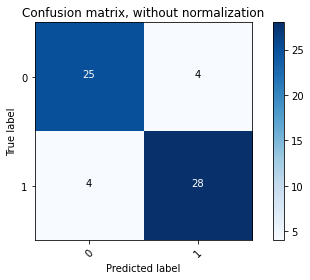

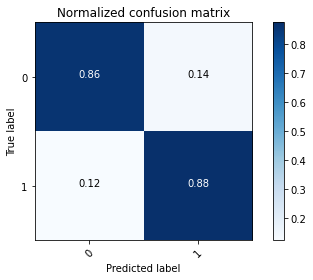

In [58]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()